### CS 178: Machine Learning &amp; Data Mining

# Discussion 02

Let's start by importing some packages. We'll point out which of these imports we are using throughout the discussion, but it's handy to have them all in one place at the top of your notebook. This way, you can reload the imports without having to re-run everything else.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import requests           # we'll use these for reading data from a url
from io import StringIO

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

seed=1234
np.random.seed(seed)

## Linear Regression

In class, we've seen the concepts of linear regression.  In this discussion, we'll see how to use the scikit-learn tools to fit and evaluate models based on linear regression.

### Example 1: Simple Slope

Let's start with a very simple example, in which our linear regression model has to fit a simple, straight line.

In [5]:
# First we create the "fake data" with x values ranging from 0 to 10 and Y = X + 2
X = np.linspace(0, 10, 50)
Y = np.copy(X) + 2

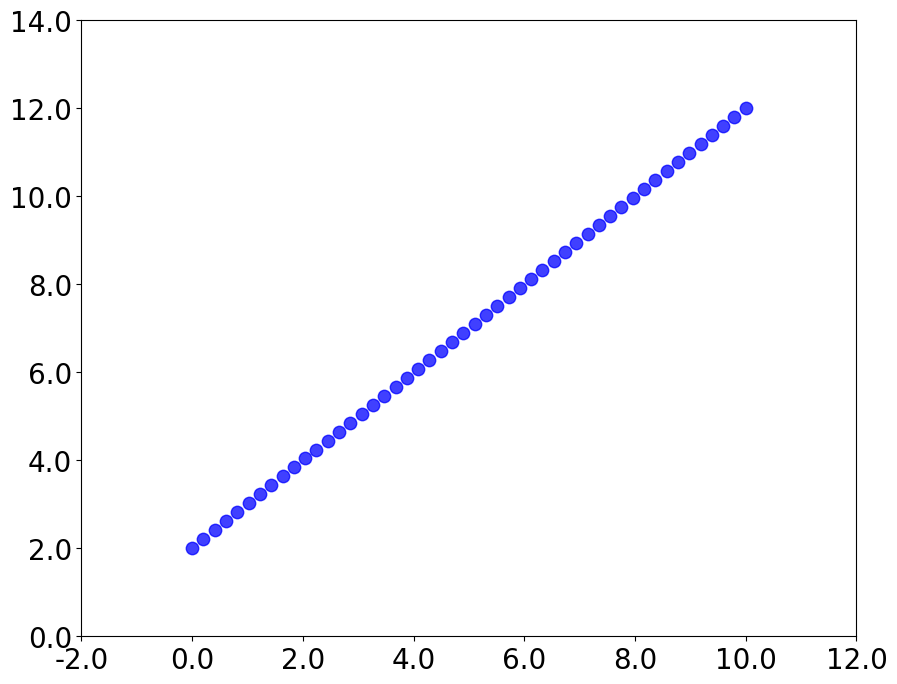

In [7]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(X, Y, s=80, color='blue', alpha=0.75)

ax.set_xlim(-0.2, 10.2)
ax.set_ylim(1.8, 12.2)
# ax.set_xticks( ax.get_xticks(), labels=ax.get_xticks(), fontsize=20)
# ax.set_yticks( ax.get_yticks(), labels=ax.get_yticks(), fontsize=20)
ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)


plt.show()

Now, let's split our trivial data into training and test subsets:

In [9]:
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.20, random_state=seed)

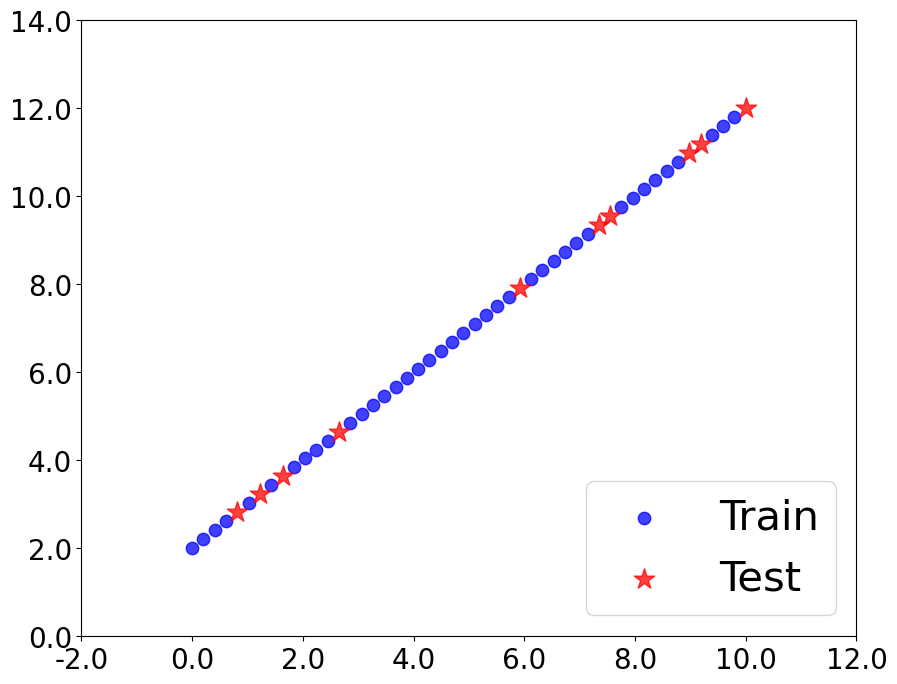

In [11]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')

ax.set_xlim(-0.2, 10.2)
ax.set_ylim(1.8, 12.2)
# ax.set_xticks( ax.get_xticks(), labels=ax.get_xticks(), fontsize=20)
# ax.set_yticks( ax.get_yticks(), labels=ax.get_yticks(), fontsize=20)

ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc='lower right')

plt.show()

Now, let's fit a linear regression model to the training subset of the data:

In [13]:
lr = LinearRegression().fit(Xt,Yt)  # init and train the model

ValueError: Expected 2D array, got 1D array instead:
array=[4.28571429 3.67346939 2.04081633 4.48979592 6.32653061 5.10204082
 2.85714286 3.46938776 4.08163265 8.7755102  5.51020408 0.20408163
 6.73469388 9.79591837 0.40816327 6.53061224 7.14285714 7.95918367
 6.93877551 0.         2.24489796 1.42857143 0.6122449  9.3877551
 1.83673469 3.26530612 1.02040816 5.71428571 8.57142857 8.16326531
 6.12244898 5.30612245 8.36734694 4.69387755 3.06122449 4.89795918
 2.44897959 7.75510204 3.87755102 9.59183673].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Ah!  What's that long error mean?  As it says at the end, the shape of our data are wrong -- our features are expected to be shape $(m,n)$, not $(m,)$.  We can reshape it manually; reshape dimensions of "-1" mean "the size required to make the array have the same number of values".

In [16]:
print(Xt.shape, Xe.shape)

Xt = Xt.reshape([-1,1]); Xe = Xe.reshape(-1,1)
print(Xt.shape, Xe.shape)

(40,) (10,)
(40, 1) (10, 1)


In [18]:
lr = LinearRegression().fit(Xt,Yt)  # init and train the model

That's better!  Now, to plot our predictions -- we can just predict at all the relevant values of $x$:

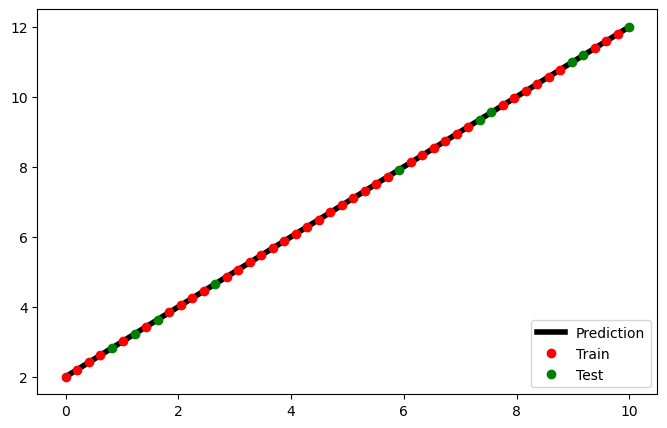

In [20]:
# to plot the prediction, we'll evaluate our model at a dense set of locations:
xs = np.linspace(0,10,200)
xs = xs.reshape(-1,1)        # features are expected to be shape (m,n), not (m,)
ys = lr.predict(xs)

plt.figure(figsize=(8,5))
lines = plt.plot(xs,ys,'k-',Xt,Yt,'r.',Xe,Ye,'g.', linewidth=4,markersize=12)
plt.legend(['Prediction','Train','Test'],loc='lower right');

We can also print out the coefficients of the line that we learned:

In [22]:
print(f'We found:  {lr.coef_} * x + {lr.intercept_}')

We found:  [1.] * x + 1.9999999999999991


# Example 2: Real Data

That was a toy example; next let's look at how this is done on real data. This is what you'll have to do in the homework assignment using the 'curve80.txt' data. We're not going to spoil it here for you, so we'll use a different data set.

In [24]:
url = 'https://www.ics.uci.edu/~ihler/classes/cs178/data/data_poly.txt'
with requests.get(url) as link:
    datafile = StringIO(link.text)
    data = np.genfromtxt(datafile, delimiter='\t')

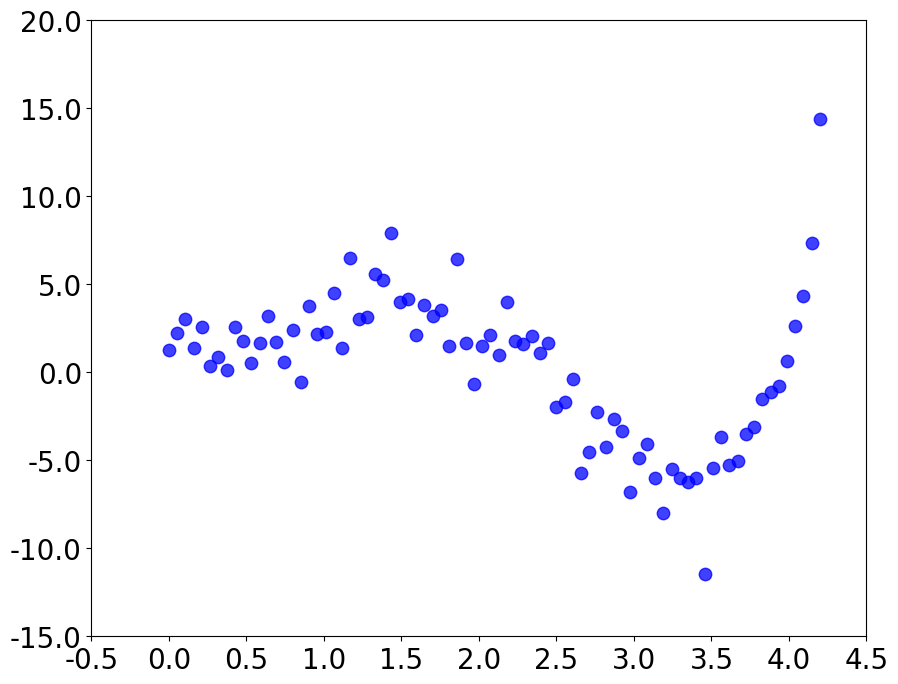

In [26]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(data[:, 0], data[:, 1], s=80, color='blue', alpha=0.75)

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

# ax.set_xticks( ax.get_xticks(), labels=ax.get_xticks(), fontsize=20)
# ax.set_yticks( ax.get_yticks(), labels=ax.get_yticks(), fontsize=20)
ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

plt.show()

Now let's repeat what we did on these more interesting data.

In [28]:
X, Y = data[:,0:-1], data[:, -1]
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.20, random_state=seed)

lr = LinearRegression().fit(Xt,Yt)

# Make sure you use the currect space.
xs = np.linspace(0, 4.2, 200).reshape(-1,1)

ys = lr.predict(xs)

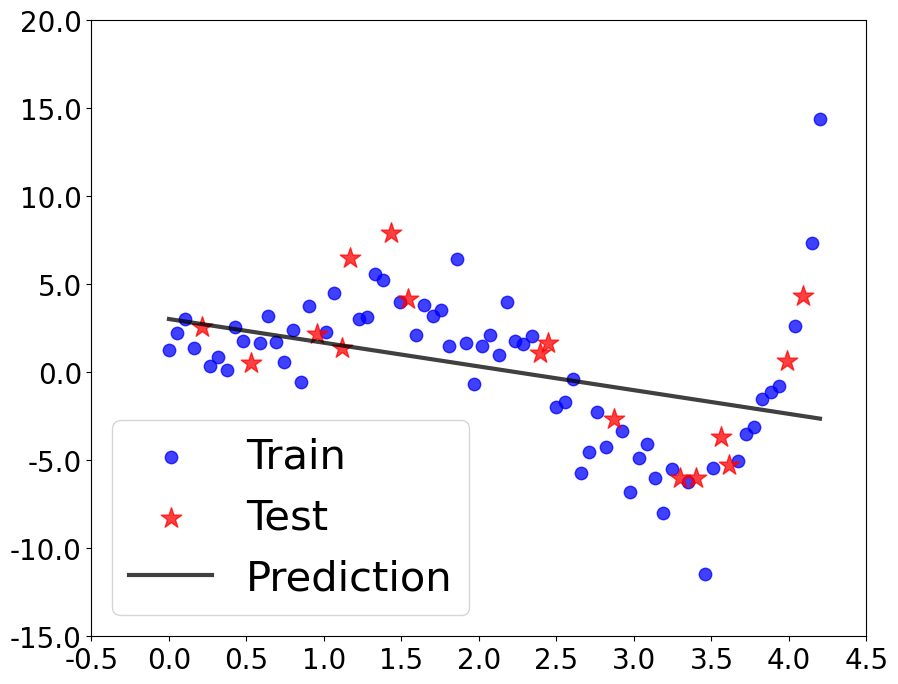

In [30]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')

# Also plotting the regression line
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)
# ax.set_xticks( ax.get_xticks(), labels=ax.get_xticks(), fontsize=20)
# ax.set_yticks( ax.get_yticks(), labels=ax.get_yticks(), fontsize=20)
ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=0)

plt.show()

Hmm; not a great fit!  What's wrong?  Well, the relationship between $x$ and $y$ is not very linear.  We saw in lecture that we can improve things by using feature transformations of the data.

Let's look at how those work, first on a small array:

In [32]:
poly = PolynomialFeatures(degree=3)
X_example = np.array([0,1,2,3]).reshape(-1,1)
print(f'Example X:\n {X_example}')

# sklearn always wants us to "fit" a preprocessing transform before using it:
poly.fit(X_example)
print(f'Transformed features, Phi(X):\n {poly.transform(X_example)}')

Example X:
 [[0]
 [1]
 [2]
 [3]]
Transformed features, Phi(X):
 [[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]


In [34]:
poly.transform(np.array([[-2,], [3]]))

array([[ 1., -2.,  4., -8.],
       [ 1.,  3.,  9., 27.]])

`scikit-learn`'s linear regression model includes its own intercept by default (`fit_intercept=True`), so including a "bias" (constant feature) in the polynomial expansion is redundant. (You could also `include_bias` in the feature transform, and use `fit_intercept=False`; but using both gives two identical feature columns.)

In [36]:
PolynomialFeatures(degree=0, include_bias=False);

OK, now let's go for a higher degree polynomial applied to our data:

In [38]:
degree = 12
poly = PolynomialFeatures(degree=degree).fit(Xt)
XtP = poly.transform(Xt)

lr = LinearRegression().fit(XtP, Yt)

# Make sure you use the currect space.
xs = np.linspace(0, 4.2, 200).reshape(-1,1)

# Notice that we have to transform the predicting xs too!
# Our "predict" function expects the same kinds of inputs it trained on: n=13 features!
xsP = poly.transform(xs)
ys = lr.predict(xsP)

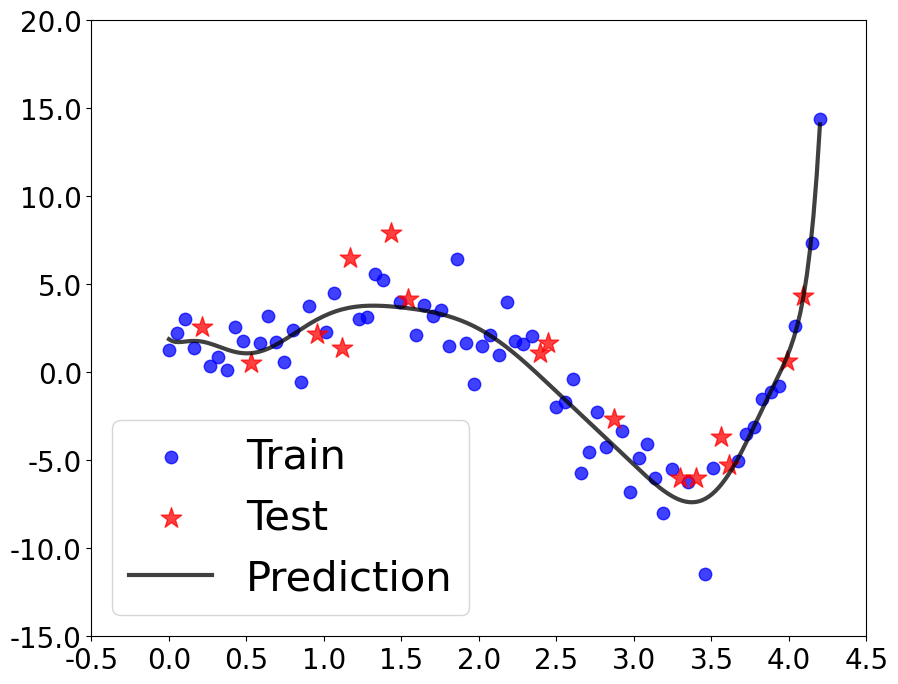

In [40]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')

# Also plotting the regression line. in the plotting we plot the xs and not the xsP
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)
# ax.set_xticks( ax.get_xticks(), labels=ax.get_xticks(), fontsize=20)
# ax.set_yticks( ax.get_yticks(), labels=ax.get_yticks(), fontsize=20)

ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=0)

plt.show()

### Measuring Prediction Accuracy

In the HW assignment you will measure the prediction error using MSE and plot it for different degrees.

In [20]:
# Predicting on the test data - DO NOT FORGET TO TRANSFORM Xte TOO!!!
XeP = poly.transform(Xe)
YeHat = lr.predict(XeP)

Adding the predicted Yhat to the plot. Notice that it sits on the regression line (as expected).

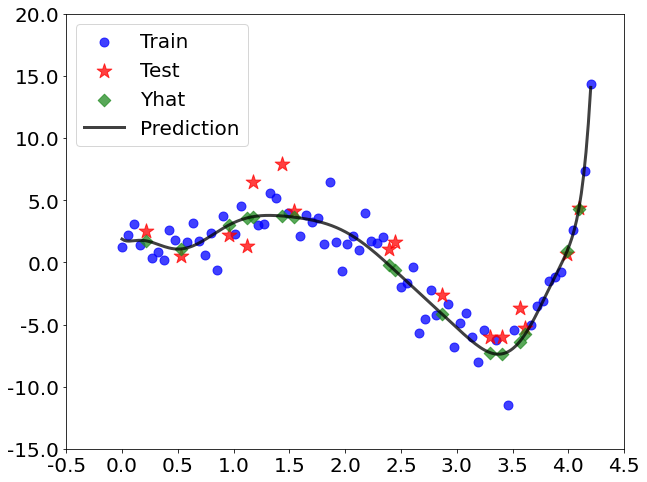

In [21]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(Xt, Yt, s=80, color='blue', alpha=0.75, label='Train')
ax.scatter(Xe, Ye, s=240, marker='*', color='red', alpha=0.75, label='Test')
ax.scatter(Xe, YeHat, s=80, marker='D', color='forestgreen', alpha=0.75, label='Yhat')

# Also plotting the regression line. in the plotting we plot the xs and not the xsP
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xlim(-0.2, 4.3)
ax.set_ylim(-13, 18)

ax.set_xticks( ax.get_xticks())
ax.set_yticks( ax.get_yticks())

ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)

# Controlling the size of the legend and the location.
ax.legend(fontsize=20, loc=0)

plt.show()

Then, we can compute our mean squared error:

In [22]:
# Manual computation:
print("MSE: ", ((Ye-YeHat)**2).mean() )

# Or, you can use the helper function from scikit:
print("MSE: ", mse(YeHat, Ye))

MSE:  3.2896933833115884
MSE:  3.2896933833115884


### Pipelines

`scikit-learn` provides a mechanism for chaining together and abstracting away a sequence of different transformations before a predictor (for example, a polynomial feature expansion, or a feature expansion and scaling operation).

In [23]:
from sklearn.pipeline import Pipeline

# Each item in the pipeline is a pair, (name, transform); the end is (name, learner):
pipe = Pipeline( [('poly',PolynomialFeatures(degree=degree)), ('linreg',LinearRegression())])
pipe.fit(Xt,Yt);

Now, we can use use `pipe` as if it was a generic `sklearn` learner, and apply `fit(X,Y)` and `predict(X)`; it will call each element's `fit` functions and `predict` functions in sequence:

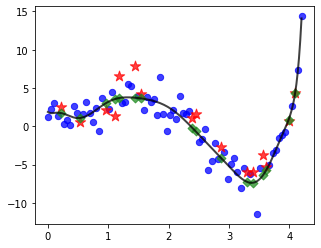

In [24]:
f, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(Xt, Yt, s=40, color='blue', alpha=0.75, label='Train')
ax.scatter(Xe, Ye, s=120, marker='*', color='red', alpha=0.75, label='Test')

ax.scatter(Xe, pipe.predict(Xe), s=40, marker='D', color='forestgreen', alpha=0.75, label='Yhat')
ax.plot(xs, pipe.predict(xs), lw=2, color='black', alpha=0.75, label='Prediction');

### Cross Validation

Let’s now imagine that we do not have access to the target values of the test data we held out in the previous problem, and we wanted to decide on the best polynomial degree.

Cross-validation works by creating many training/validation splits, called folds, and using all of these splits to assess the “out-of-sample” (validation) performance by averaging them.

In [43]:
nFolds = 4

kf = KFold(n_splits=nFolds)

The "folds" are just lists of data indices that belong to one group (training) or the other (validation), e.g.:

In [46]:
list(enumerate(kf.split(Xt)))

[(0,
  (array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
          33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
          50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))),
 (1,
  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 32,
          33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
          50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
   array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]))),
 (2,
  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 48, 49,
          50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
   array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]))),
 (3,
  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 

Then, we index using these lists to extract the two subsets of data:

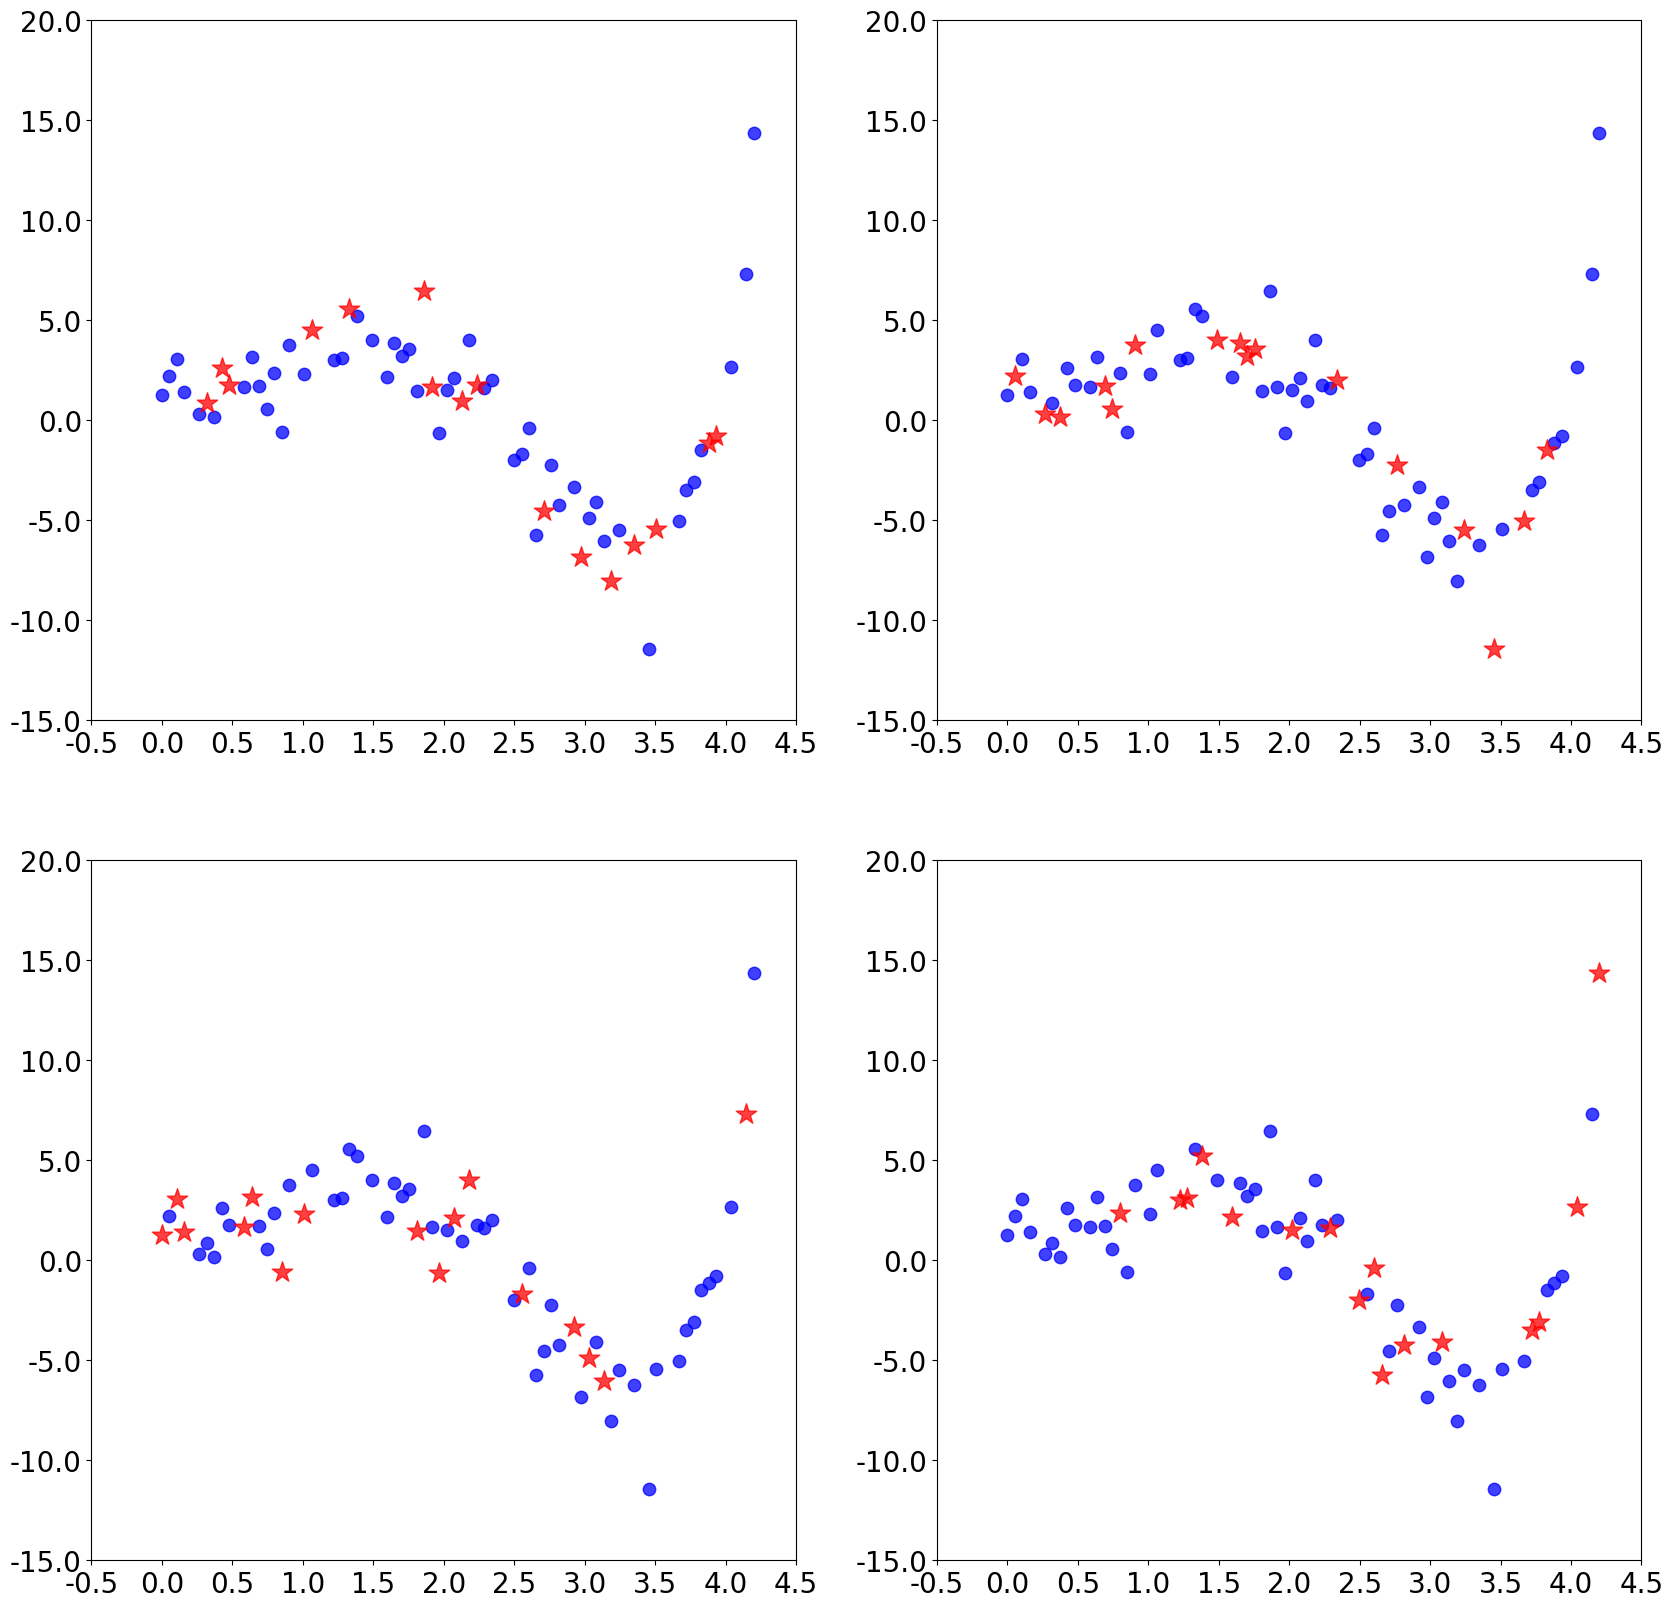

In [50]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax = ax.flatten()

for iFold, (train_index, val_index) in enumerate(kf.split(Xt)):
    Xti, Xvi, Yti, Yvi = Xt[train_index],Xt[val_index],Yt[train_index],Yt[val_index]
    ax[iFold].scatter(Xti, Yti, s=80, color='blue', alpha=0.75, label='Train')
    ax[iFold].scatter(Xvi, Yvi, s=240, marker='*', color='red', alpha=0.75, label='Test')

    ax[iFold].set_xlim(-0.2, 4.3)
    ax[iFold].set_ylim(-13, 18)
    # ax[iFold].set_xticks( ax[iFold].get_xticks(), labels=ax[iFold].get_xticks(), fontsize=20)
    # ax[iFold].set_yticks( ax[iFold].get_yticks(), labels=ax[iFold].get_yticks(), fontsize=20)

    ax[iFold].set_xticks( ax[iFold].get_xticks())
    ax[iFold].set_yticks( ax[iFold].get_yticks())

    ax[iFold].set_xticklabels(ax[iFold].get_xticks(), fontsize=20)
    ax[iFold].set_yticklabels(ax[iFold].get_yticks(), fontsize=20)

plt.show()